# A7: Final Project Report

* __University of Washington__
* __DATA512 Fall 2020__
* __Sihao Miao__
* __December 15, 2020__

### 1. Introduction

I was intrigued by my friend's H-1B petition experiece and decided to analyze the H-1B Employer Data published on U.S. Citizenship and Immigration Services (USCIS) website. USCIS has its own H-1B Employer Data Hub that provides information on employers petitioning for H-1B workers from fiscal year 2009 to fiscal year 2020 (quarter 3). Just for someone who is not familar with H-1B, according to [USCIS](https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub), “The H-1B program allows employers in the United States to temporarily employ foreign workers in occupations that require the theoretical and practical application of a body of highly specialized knowledge and a bachelor's degree or higher in the specific specialty, or its equivalent.”   
   
As an international student studying in the United States, I will be required to get a valid H-1B visa if I want to work in the States legally after graduation. Therefore, I'm interested in seeing the approval and denial data extracted from Form I-129 submitted to USCIS, and in particular, I would like to know the approval and denial rates by employer in the last 5 years. From a human-centered perspective, the purpose of this analysis is to understand both the trend of approval and denial rates over years as well as possible factors affecting such decison in the immigration system. I intend to conduct this analysis in a reproducible way such that other temporary foreign workers might find it useful and apply it into their own analysis. 

### 2. Background and Related Work

The initial intention of this study was about my personal background, as an international student, H-1B approval or denial decision is extremely important to me in terms of my career path. As far as I am concerned, the H-1B approval rate is decreasing in the last few years because of resource limitation, high immigration rate, and policy regulation. Therefore, I decided to perform this study to figure out the key indicators for many people who have the same concern as me to make a career decision. Most of the previous research I have found in this specific domain focused more on the employee's side, in a sense, they conducted analysis using more features of employees than employers.   
   
For example, this research [H1-B Visa Data Analysis and Prediction by using K-means Clustering and Decision Tree Algorithms](https://github.com/Jinglin-LI/H1B-Visa-Prediction-by-Machine-Learning-Algorithm) by Renchi liu and Jinglin Li performed an analysis using some attributes such as employee's name, job title, wage, and education level. They chose to use machine learning models to predict the H-1B approval and denial rate under many different conditions. In particular, they used decision tree and K-means algorithms to train and test the prediciton results. I was inspired by their research and decided to anaylze if other features could impact the approval and denial rate. Therefore, I found the USCIS dataset gathering data from the employer's side so that I can get some features like employer's state, city, zip code, and industry. 
  
Based on the USCIS dataset, I also found another excellent tableau work [H-1B Employer Data Hub Dashboard](https://public.tableau.com/profile/brian.safran#!/vizhome/H-1BEmployerDataHubFY09-FY19/Dashboard1) by Brian J. Safran. This visualization work used the same dataset I plan to work on so that I can get a better understanding of the dataset after playing with the two dashboards. Moreover, I would like to draw more inferences from the data such as the correlation between employer's features and approval/denial rate. Therefore, I designed my study by using a linear regression model to check if there exists a statistically significant relationship between those factors. 

### 3. Research Questions and Hypotheses

The USCIS has a large dataset called H-1B Employer Data Hub that provides historical approval and denial data reflecting USCIS’s first decision. I'm curious to find out what the factors are that lead to the H-1B final decision through the fiscal years of 2015 to 2019. Therefore, I addressed two research questions and two corresponding hypotheses below.
   
Research question:
* What is the trend of H-1B approval and denial rates over fiscal years 2015 to 2019?
* Which states, employers, and industries are most likely to get H-1B approved by USCIS?

Hypothesis:
* The H-1B aprroval rate decreased over the last 5 fiscal years even though the number of H-1B all decisions increased. 
* There exists some sort of state and industry bias in getting H-1B approved by USCIS; in other words, the H-1B approval rate is correlated with two features: state and industry. 

### 4. Methodology

### 4.1 Data Description

For this analysis, I used H-1B Employer Data from U.S. Citizenship and Immigration Services (USCIS) because the dataset including data from fiscal year 2009 through fiscal year 2020 (quarter 2) is publicly available. The main page of H-1B Employer Data Hub can be found [here](https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub) and we can download all data files through this [link](https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files). The dataset consists of the counts of initial approval, initial denial, continuing approval, and continuing denial are aggregated by distinct completion fiscal year, two digit NAICS code, tax ID, state, city, and ZIP code. As stated on [this page](https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files), the dataset provide by USCIS can be used for personal and non-commercial use. We are allowed to download data for individual fiscal years and conduct our own analyses of these data. More information about terms of use for the data can be found [here](https://www.uscis.gov/tools/reports-and-studies/understanding-our-data). Here are some notes for this dataset:
1. One employer with multiple addresses in a given fiscal year will have multiple rows in the data. 
2. The most common spelling of employer name per unique tax ID is used. 
3. Subsequent decisions, such as on an appeal or revocation, are excluded. 
4. The data does not include petitions that are pending adjudication when USCIS generates the data. 

While this dataset is available to public, it only identifies the last four digits of the Petitioner’s Tax ID Number for privacy purpose. And in my analysis, I removed this part of data just for ethical consideration. Overall, I believe this is a suitable dataset for my project because it has all the infomation I would like to explore for addressing my research goal as I mentioned in the Motivation and Problem Statement section. I can calculate the approval and denial rates by looking at the counts of initial approval, initial denial, continuing approval, and continuing denial, and visualize the difference between locations by using the state, city, and ZIP code.

### 4.2 Data Preperation and Anlytical Methods

To answer the questions and test the hypotheses proposed for this study, I used the following methods to perform my analysis in a reproducible way. 
   
__Data Preperation__
* Download the H-1B employer data from the USCIS website.
* Drop irrelevant columns and check the null value rate in this dataset.
* Calculate the counts of all decisions, all approvals, all denials, and the approval rate for each fiscal year, and put those values in a new dataframe. 
* Create a new column called approval_rate by calculating the approval rate for each employer in the specific fiscal year and the formula used is (initial approval + continuing approval) / (initial approval + initial denial + continuing approval + continuing denial).      

__Analytical Methods__
* Perform a descriptive analysis to measure the frequency of all decisions, all approvals, and all denials in each fiscal year.
* Visualize the counts with a bar chart and highlight the approval rate with a trend line.
* Perform a linear regression model to see if there is a statistically significant relationship between approval rate, state, industry and/or year. 
* Find trends in those sets of data and visualize the results with a scatter plot.

### 5. Findings

__Question 1__   
* In general, the number of all decisions increased in the fiscal years 2015 to 2019 while the approval rate decreased.
* In particular, the number of all denials was steadily increasing in the last five years; the number of all decisions/all approvals decreased a little bit from year 2017 to 2018 but overall, it was increasing.
* The approval rate decreased a lot with respect to the 5-year time period, it was around 96% in the year 2015 and then sharply decreased by 11% in the next 5 years. 

In [84]:
df2.head()

,Fiscal Year,Approval Rate,All Decision,All Approvals,All Denials
0,2015,0.956649,301559,288486,13073
1,2016,0.939424,380219,357187,23032
2,2017,0.925962,403237,373382,29855
3,2018,0.845201,396289,334944,61345
4,2019,0.848502,458831,389319,69512


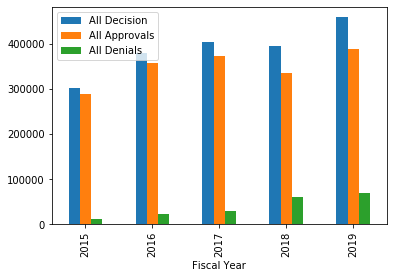

In [82]:
df2.plot(x="Fiscal Year", y=['All Decision','All Approvals','All Denials'], kind="bar")

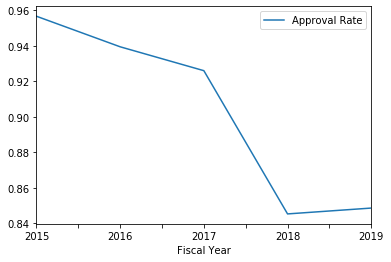

In [83]:
df2.plot(kind='line',x='Fiscal Year',y='Approval Rate')

__Question 2__    
* The R-squared value I got was 0.909, meaning that the linear regression model explains 90.9% of the variance in our dependent variable.
* The top 3 industries in terms of having a higher chance to get H-1B approved are: “Professional, Scientific, and Technical Services”, “Manufacturing”, and “Information”.
* Similarly, the top 3 states are CA, TX, and NJ.
* The H-1B approval rate is correlated with state, industry and fiscal year. 

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Approval Rate   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          3.286e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                        0.00
Time:                        07:54:42   Log-Likelihood:                         -39721.
No. Observations:              266524   AIC:                                  7.960e+04
Df Residuals:                  266443   BIC:                                  8.045e+04
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Fiscal Year    -0.0010   9.55e-05    -10.464      0.000      -0.001      -0.001
State_AK        2.8752      0.194     14.847      0.000       2.496       3.255
State_AL        2.8783      0.192     14.956      0.000       2.501       3.256
State_AR        2.8700      0.193     14.904      0.000       2.493       3.247
State_AZ        2.8630      0.192     14.882      0.000       2.486       3.240
State_CA        2.8531      0.192     14.836      0.000       2.476       3.230
State_CO        2.8688      0.192     14.912      0.000       2.492       3.246
State_CT        2.8907      0.192     15.027      0.000       2.514       3.268
State_DC        2.8888      0.192     15.016      0.000       2.512       3.266
State_DE        2.8248      0.193     14.673      0.000       2.447       3.202
State_FL        2.8335      0.192     14.734      0.000       2.457       3.210
State_FM        3.0107      0.340      8.843      0.000       2.343       3.678
State_GA        2.8406      0.192     14.769      0.000       2.464       3.218
State_GU        2.8791      0.193     14.938      0.000       2.501       3.257
State_HI        2.8820      0.193     14.947      0.000       2.504       3.260
State_IA        2.8625      0.192     14.871      0.000       2.485       3.240
State_ID        2.8717      0.193     14.874      0.000       2.493       3.250
State_IL        2.8526      0.192     14.832      0.000       2.476       3.230
State_IN        2.8767      0.192     14.952      0.000       2.500       3.254
State_KS        2.8536      0.192     14.827      0.000       2.476       3.231
State_KY        2.8824      0.192     14.976      0.000       2.505       3.260
State_LA        2.8786      0.192     14.956      0.000       2.501       3.256
State_MA        2.8817      0.192     14.982      0.000       2.505       3.259
State_MD        2.8744      0.192     14.943      0.000       2.497       3.251
State_ME        2.9017      0.193     15.044      0.000       2.524       3.280
State_MI        2.8536      0.192     14.836      0.000       2.477       3.231
State_MN        2.8800      0.192     14.971      0.000       2.503       3.257
State_MO        2.8679      0.192     14.907      0.000       2.491       3.245
State_MP        2.7226      0.193     14.096      0.000       2.344       3.101
State_MS        2.8666      0.193     14.878      0.000       2.489       3.244
State_MT        2.8591      0.194     14.737      0.000       2.479       3.239
State_NC        2.8696      0.192     14.918      0.000       2.493       3.247
State_ND        2.8996      0.193     15.034      0.000       2.522       3.278
State_NE        2.8985      0.193     15.056      0.000       2.521       3.276
State_NH        2.8722  

### 6. Discussion

__Data Limitation__     
Since the data was transformed from paper forms manually, there may exist some entry errors. As a result, some employer name, tax ID, state, city, or ZIP code in this dataset may be missing and/or erroneous. In order to use the dataset appropriately, we need to check the missing rate in each file before conducting the analysis. Therefore, for some years having a high null value rate, we can use an alternative dataset: the DHS Office of Immigration Statistics (OIS) [dataset](https://www.dhs.gov/immigration-statistics). However, we will need to extract the correponding data in the yearly report by ourselves.

### 7. Conclusion

* In general, the number of all decisions increased in the fiscal years 2015 to 2019 while the approval rate decreased.
* The H-1B approval rate is correlated with state, industry and fiscal year.

### Code

In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
# load data
path = r'./uscis_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [3]:
data.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
0,2015,ARCTIC SLOPE REGIONAL CORP ASRC,0,0,1,0,55,NaN,AK,ANCHORAGE,99503.0
1,2015,BRADLEY ACADEMY OF EXCELLENCE INC,0,0,1,0,61,NaN,AZ,GOODYEAR,85338.0
2,2015,GADSDEN ELEMENTARY SCHOOL DISTRIC,0,0,1,0,61,NaN,AZ,SAN LUIS,85349.0
3,2015,TRUMEX DISTRIBUTION & CONSULTING I,0,0,1,0,99,NaN,CA,ARCADIA,91006.0
4,2015,GRABBER INC /IMPACT PHOTOGRAPHICS,0,0,1,0,54,NaN,CA,EL DORADO,95762.0


In [4]:
data['Fiscal Year'].value_counts()

2019    59441
2018    55666
2016    53129
2017    49786
2015    48544
Name: Fiscal Year, dtype: int64

In [5]:
# drop rows with null values in those colomns 
df = data.dropna(subset=['Initial Approvals','Initial Denials','Continuing Approvals','Continuing Denials','NAICS','State'], how='any')

In [163]:
a = pd.DataFrame(df['Fiscal Year'].value_counts())

In [164]:
a.head()

,Fiscal Year
2019,59437
2018,55659
2016,53117
2017,49774
2015,48537


In [7]:
df['Initial Approvals'] = df['Initial Approvals'].replace(" ", "", regex=True)
df['Initial Approvals'] = df['Initial Approvals'].replace(",", "", regex=True)
df['Initial Approvals'].replace("", np.nan, inplace=True) 
df['Initial Approvals'].dropna(inplace=True) 
df['Initial Approvals'] = df['Initial Approvals'].astype(int) 

/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [8]:
df['Initial Denials'] = df['Initial Denials'].replace(" ", "", regex=True)
df['Initial Denials'] = df['Initial Denials'].replace(",", "", regex=True)
df['Initial Denials'].replace("", np.nan, inplace=True) 
df['Initial Denials'].dropna(inplace=True) 
df['Initial Denials'] = df['Initial Denials'].astype(int) 

/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [9]:
df['Continuing Approvals'] = df['Continuing Approvals'].replace(" ", "", regex=True)
df['Continuing Approvals'] = df['Continuing Approvals'].replace(",", "", regex=True)
df['Continuing Approvals'].replace("", np.nan, inplace=True) 
df['Continuing Approvals'].dropna(inplace=True) 
df['Continuing Approvals'] = df['Continuing Approvals'].astype(int)

/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [10]:
df['Continuing Denials'] = df['Continuing Denials'].replace(" ", "", regex=True)
df['Continuing Denials'] = df['Continuing Denials'].replace(",", "", regex=True)
df['Continuing Denials'].replace("", np.nan, inplace=True) 
df['Continuing Denials'].dropna(inplace=True) 
df['Continuing Denials'] = df['Continuing Denials'].astype(int)

/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266524 entries, 0 to 266565
Data columns (total 11 columns):
Fiscal Year             266524 non-null int64
Employer                266503 non-null object
Initial Approvals       266524 non-null int64
Initial Denials         266524 non-null int64
Continuing Approvals    266524 non-null int64
Continuing Denials      266524 non-null int64
NAICS                   266524 non-null int64
Tax ID                  265928 non-null float64
State                   266524 non-null object
City                    266524 non-null object
ZIP                     266524 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 24.4+ MB


In [12]:
df['Approval Rate'] = (df['Initial Approvals']+df['Continuing Approvals'])/(df['Initial Approvals']+df['Initial Denials']+df['Continuing Approvals']+df['Continuing Denials'])

/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP,Approval Rate
0,2015,ARCTIC SLOPE REGIONAL CORP ASRC,0,0,1,0,55,NaN,AK,ANCHORAGE,99503.0,1.0
1,2015,BRADLEY ACADEMY OF EXCELLENCE INC,0,0,1,0,61,NaN,AZ,GOODYEAR,85338.0,1.0
2,2015,GADSDEN ELEMENTARY SCHOOL DISTRIC,0,0,1,0,61,NaN,AZ,SAN LUIS,85349.0,1.0
3,2015,TRUMEX DISTRIBUTION & CONSULTING I,0,0,1,0,99,NaN,CA,ARCADIA,91006.0,1.0
4,2015,GRABBER INC /IMPACT PHOTOGRAPHICS,0,0,1,0,54,NaN,CA,EL DORADO,95762.0,1.0


In [157]:
df['Approval Rate'].value_counts()

1.000000    212665
0.000000     20864
0.500000      6030
0.666667      3158
0.750000      2007
             ...  
0.650930         1
0.595745         1
0.689922         1
0.987220         1
0.952756         1
Name: Approval Rate, Length: 2101, dtype: int64

In [14]:
df['NAICS'] = df['NAICS'].astype(str)

/Users/lindsaymiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2 = pd.DataFrame(df.groupby('Fiscal Year').apply(lambda x: pd.Series({'Approval Rate':(x['Initial Approvals'].sum()+x['Continuing Approvals'].sum())/(x['Initial Approvals'].sum()+x['Continuing Approvals'].sum()+x['Initial Denials'].sum()+x['Continuing Denials'].sum())}))).reset_index()

In [39]:
df3 = pd.DataFrame(df.groupby('Fiscal Year').apply(lambda x: pd.Series({'All Decision': x['Initial Approvals'].sum()+x['Continuing Approvals'].sum()+x['Initial Denials'].sum()+x['Continuing Denials'].sum()}))).reset_index()

In [57]:
df4 = pd.DataFrame(df.groupby('Fiscal Year').apply(lambda x: pd.Series({'All Approvals': x['Initial Approvals'].sum()+x['Continuing Approvals'].sum()}))).reset_index()

In [58]:
df5 = pd.DataFrame(df.groupby('Fiscal Year').apply(lambda x: pd.Series({'All Denials': x['Initial Denials'].sum()+x['Continuing Denials'].sum()}))).reset_index()

In [59]:
df2['All Decision']=df3['All Decision']
df2['All Approvals']=df4['All Approvals']
df2['All Denials']=df5['All Denials']

In [60]:
df2.head()

,Fiscal Year,Approval Rate,All Decision,All Approvals,All Denials
0,2015,0.956649,301559,288486,13073
1,2016,0.939424,380219,357187,23032
2,2017,0.925962,403237,373382,29855
3,2018,0.845201,396289,334944,61345
4,2019,0.848502,458831,389319,69512


In [48]:
df2['Fiscal Year'] = df2['Fiscal Year'].astype(str)

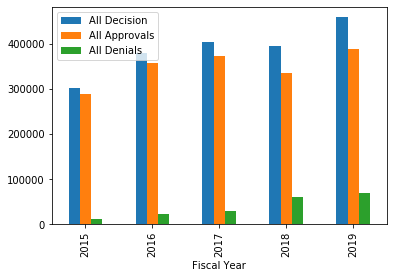

In [75]:
df2.plot(x="Fiscal Year", y=['All Decision','All Approvals','All Denials'], kind="bar")

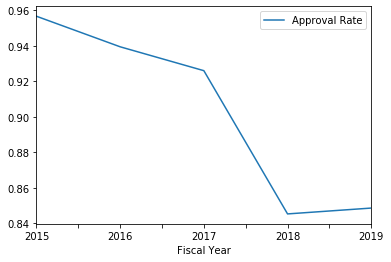

In [76]:
df2.plot(kind='line',x='Fiscal Year',y='Approval Rate')
plt.show()

In [53]:
df.corr()

,Fiscal Year,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,Tax ID,ZIP,Approval Rate
Fiscal Year,1.000000,-0.002182,0.026536,0.001140,0.013096,0.002087,0.005841,-0.115663
Initial Approvals,-0.002182,1.000000,0.415350,0.757725,0.328006,-0.002696,0.002241,0.013234
Initial Denials,0.026536,0.415350,1.000000,0.518692,0.777156,-0.000373,-0.004707,-0.078005
Continuing Approvals,0.001140,0.757725,0.518692,1.000000,0.601287,-0.002244,0.001709,0.006659
Continuing Denials,0.013096,0.328006,0.777156,0.601287,1.000000,-0.001570,-0.001900,-0.018429
Tax ID,0.002087,-0.002696,-0.000373,-0.002244,-0.001570,1.000000,0.000442,0.000387
ZIP,0.005841,0.002241,-0.004707,0.001709,-0.001900,0.000442,1.000000,-0.007627
Approval Rate,-0.115663,0.013234,-0.078005,0.006659,-0.018429,0.000387,-0.007627,1.000000


In [86]:
import statsmodels.api as sm
X = df[['State', 'NAICS', 'Fiscal Year']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Fiscal Year,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,NAICS_99
0,2015,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2015,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2015,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2015,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [87]:
y = df['Approval Rate']

In [88]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Approval Rate   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          3.286e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                        0.00
Time:                        07:54:32   Log-Likelihood:                         -39721.
No. Observations:              266524   AIC:                                  7.960e+04
Df Residuals:                  266443   BIC:                                  8.045e+04
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Fiscal Year    -0.0010   9.55e-05    -10.464      0.000      -0.001      -0.001
State_AK        2.8752      0.194     14.847      0.000       2.496       3.255
State_AL        2.8783      0.192     14.956      0.000       2.501       3.256
State_AR        2.8700      0.193     14.904      0.000       2.493       3.247
State_AZ        2.8630      0.192     14.882      0.000       2.486       3.240
State_CA        2.8531      0.192     14.836      0.000       2.476       3.230
State_CO        2.8688      0.192     14.912      0.000       2.492       3.246
State_CT        2.8907      0.192     15.027      0.000       2.514       3.268
State_DC        2.8888      0.192     15.016      0.000       2.512       3.266
State_DE        2.8248      0.193     14.673      0.000       2.447       3.202
State_FL        2.8335      0.192     14.734      0.000       2.457       3.210
State_FM        3.0107      0.340      8.843      0.000       2.343       3.678
State_GA        2.8406      0.192     14.769      0.000       2.464       3.218
State_GU        2.8791      0.193     14.938      0.000       2.501       3.257
State_HI        2.8820      0.193     14.947      0.000       2.504       3.260
State_IA        2.8625      0.192     14.871      0.000       2.485       3.240
State_ID        2.8717      0.193     14.874      0.000       2.493       3.250
State_IL        2.8526      0.192     14.832      0.000       2.476       3.230
State_IN        2.8767      0.192     14.952      0.000       2.500       3.254
State_KS        2.8536      0.192     14.827      0.000       2.476       3.231
State_KY        2.8824      0.192     14.976      0.000       2.505       3.260
State_LA        2.8786      0.192     14.956      0.000       2.501       3.256
State_MA        2.8817      0.192     14.982      0.000       2.505       3.259
State_MD        2.8744      0.192     14.943      0.000       2.497       3.251
State_ME        2.9017      0.193     15.044      0.000       2.524       3.280
State_MI        2.8536      0.192     14.836      0.000       2.477       3.231
State_MN        2.8800      0.192     14.971      0.000       2.503       3.257
State_MO        2.8679      0.192     14.907      0.000       2.491       3.245
State_MP        2.7226      0.193     14.096      0.000       2.344       3.101
State_MS        2.8666      0.193     14.878      0.000       2.489       3.244
State_MT        2.8591      0.194     14.737      0.000       2.479       3.239
State_NC        2.8696      0.192     14.918      0.000       2.493       3.247
State_ND        2.8996      0.193     15.034      0.000       2.522       3.278
State_NE        2.8985      0.193     15.056      0.000       2.521       3.276
State_NH        2.8722  

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print(model.intercept_)

46.87671419012912


In [72]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Fiscal Year,-0.022767
State_AK,-0.094029
State_AL,-0.069563
State_AR,-0.085848
State_AZ,-0.086842
...,...
NAICS_71,-0.040817
NAICS_72,-0.089654
NAICS_81,0.006987
NAICS_92,0.059323


In [73]:
predictions = model.predict(X_test)
predictions

array([0.8718028 , 0.88323307, 0.94964843, ..., 0.85000826, 0.90578151,
       0.91923904])

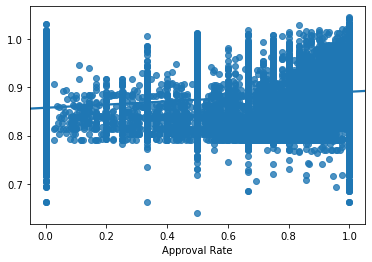

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(y_test,predictions)

In [138]:
df['State'].value_counts()

CA    53326
NY    32323
TX    25212
NJ    17029
IL    12690
MA    12091
FL    11870
VA     9263
MI     8651
PA     8472
GA     7966
MD     5368
OH     5275
WA     5141
NC     4601
CT     3520
MN     3352
AZ     2976
MO     2840
CO     2819
DC     2752
IN     2371
WI     2297
TN     2163
SC     1498
UT     1476
KS     1414
OR     1389
AL     1317
LA     1296
KY     1273
OK     1245
IA     1171
NE     1045
DE      995
NV      994
AR      814
NH      770
NM      603
RI      588
MS      559
GU      478
WV      402
HI      401
ND      362
ME      353
VT      281
ID      274
MP      249
SD      237
PR      219
AK      151
MT      121
WY      119
VI       59
AE        2
FM        1
Name: State, dtype: int64

In [142]:
df.groupby('State').apply(lambda x: (x['Initial Approvals'].sum()+x['Continuing Approvals'].sum())/(x['Initial Approvals'].sum()+x['Initial Denials'].sum()+x['Continuing Approvals'].sum()+x['Continuing Denials'].sum()))

State
AE    1.000000
AK    0.933824
AL    0.946209
AR    0.940611
AZ    0.937722
CA    0.928805
CO    0.924246
CT    0.928736
DC    0.931207
DE    0.881672
FL    0.862572
FM    1.000000
GA    0.855185
GU    0.918367
HI    0.931282
IA    0.877307
ID    0.958898
IL    0.882617
IN    0.926952
KS    0.892980
KY    0.919621
LA    0.922879
MA    0.913213
MD    0.901313
ME    0.953258
MI    0.875766
MN    0.935851
MO    0.903920
MP    0.734940
MS    0.942604
MT    0.939481
NC    0.903642
ND    0.950820
NE    0.943214
NH    0.890703
NJ    0.865739
NM    0.896743
NV    0.904418
NY    0.928632
OH    0.890664
OK    0.924586
OR    0.923932
PA    0.886727
PR    0.861963
RI    0.951694
SC    0.898054
SD    0.953416
TN    0.950939
TX    0.871138
UT    0.918212
VA    0.873786
VI    0.848276
VT    0.968952
WA    0.957298
WI    0.937028
WV    0.940016
WY    0.895270
dtype: float64

In [67]:
df['NAICS'].value_counts()

54    114149
62     23824
33     21761
52     16633
61     15288
51     14547
42      8242
32      7307
99      6772
44      5315
23      4305
56      4134
31      3451
81      3369
53      2806
72      2646
48      2071
45      2027
92      1633
71      1590
21      1457
22      1407
55       764
11       636
49       390
Name: NAICS, dtype: int64

In [68]:
df.groupby('NAICS').apply(lambda x: (x['Initial Approvals'].sum()+x['Continuing Approvals'].sum())/(x['Initial Approvals'].sum()+x['Initial Denials'].sum()+x['Continuing Approvals'].sum()+x['Continuing Denials'].sum()))

NAICS
11    0.847270
21    0.949499
22    0.959745
23    0.918516
31    0.929215
32    0.954990
33    0.969311
42    0.904266
44    0.915840
45    0.969549
48    0.918330
49    0.928571
51    0.959570
52    0.959841
53    0.885411
54    0.865323
55    0.971006
56    0.863890
61    0.964170
62    0.953298
71    0.856968
72    0.831428
81    0.894077
92    0.926357
99    0.841750
dtype: float64